In [0]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
zf = zipfile.ZipFile('dataSet.zip') 
df = pd.read_csv(zf.open('37100122.csv'))

# Relationship of Number of Graduates and Income 

In [0]:
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Educational qualification',
       'Field of study', 'Gender', 'Age group', 'Status of student in Canada',
       'Characteristics after graduation', 'Graduate statistics', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [0]:
#Geting relevant data
df = pd.DataFrame(df[['REF_DATE','Gender','Age group','Field of study','Characteristics after graduation','Graduate statistics','VALUE','STATUS']])

# Cleaning Data

In [0]:
NaN_value = df.isnull().sum().sort_values(ascending = False)
NaN_value

STATUS                              1835674
VALUE                                353633
Graduate statistics                       0
Characteristics after graduation          0
Field of study                            0
Age group                                 0
Gender                                    0
REF_DATE                                  0
dtype: int64

In [0]:
df['STATUS'].value_counts()

x     323799
..     29834
Name: STATUS, dtype: int64

In [0]:
# Drop None values and unqualified data
df.dropna(subset = ["VALUE"], inplace=True)
df.drop(df[df.STATUS=='..'].index, inplace=True)
df.drop(df[df.STATUS=='x'].index, inplace=True)
df['STATUS'].value_counts()

Series([], Name: STATUS, dtype: int64)

In [0]:
# Check
df.isnull().sum().sort_values(ascending = False)

STATUS                              1835674
VALUE                                     0
Graduate statistics                       0
Characteristics after graduation          0
Field of study                            0
Age group                                 0
Gender                                    0
REF_DATE                                  0
dtype: int64

In [0]:
# Attribute "STATUS" is irrelevant now
df.drop(columns='STATUS',inplace= True)

In [0]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835674 entries, 0 to 2189305
Data columns (total 7 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   REF_DATE                          int64  
 1   Gender                            object 
 2   Age group                         object 
 3   Field of study                    object 
 4   Characteristics after graduation  object 
 5   Graduate statistics               object 
 6   VALUE                             float64
dtypes: float64(1), int64(1), object(5)
memory usage: 112.0+ MB


In [0]:
#Change relevant data type to category
df[['Gender','Age group','Field of study','Characteristics after graduation','Graduate statistics']] = df[['Gender','Age group','Field of study','Characteristics after graduation','Graduate statistics']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1835674 entries, 0 to 2189305
Data columns (total 7 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   REF_DATE                          int64   
 1   Gender                            category
 2   Age group                         category
 3   Field of study                    category
 4   Characteristics after graduation  category
 5   Graduate statistics               category
 6   VALUE                             float64 
dtypes: category(5), float64(1), int64(1)
memory usage: 50.8 MB


## Seperate Numbers of Graduates and Median of income from Column 'VALUE' 

In [0]:
# Seperate Numbers of Graduates and Median of income from Column 'VALUE' into two DataFrame to see a correlation between them
df['Graduate statistics'].value_counts()

Number of graduates         1587038
Median employment income     248636
Name: Graduate statistics, dtype: int64

In [0]:
# Dataframe contain "Number of Graduates" only
df_Number = df[~df['Graduate statistics'].isin(['Median employment income'])]
df_Number.shape

(1587038, 7)

In [0]:
# Number of graduates in each field of study, 'Total' is irrelevant here.
df_Number = df_Number[~df_Number['Field of study'].isin(['Total, field of study'])]
df_Number.shape

(1502529, 7)

In [0]:
# DataFrame one: Number of graduates in each field of study
df_Number_of_Graduate = df_Number[['Field of study', 'VALUE']].groupby(['Field of study'], as_index=True).count().sort_values(by='Field of study', ascending=True)
df_Number_of_Graduate = df_Number_of_Graduate.rename(columns={"VALUE": "Number Of Graduates",})
df_Number_of_Graduate.head()

,Number Of Graduates
Field of study,
"Aboriginal and foreign languages, literatures and linguistics [16]",26568
"Agriculture, agriculture operations and related sciences [1]",26301
"Agriculture, natural resources and conservation [9]",36024
Architecture and related services [4],19635
"Architecture, engineering, and related technologies [8]",42077




---



In [0]:
# Dataframe contain "Income median" only
df_Income = df[~df['Graduate statistics'].isin(['Number of graduates'])]
df_Income.shape

(248636, 7)

In [0]:
# Income median in each field of study, 'Total' is irrelevant here.
df_Income = df_Income[~df_Income['Field of study'].isin(['Total, field of study'])]
df_Income.shape

(226490, 7)

In [0]:
# Calculate Income Median of each Field of study	
df_Field_of_Study_Income_Median = df_Income[['Field of study', 'VALUE']].groupby(['Field of study'], as_index=True).median().sort_values(by='Field of study', ascending=True)
df_Field_of_Study_Income_Median = df_Field_of_Study_Income_Median.rename(columns={'VALUE':'Field Of Study Income Median'})
df_Field_of_Study_Income_Median.head()

,Field Of Study Income Median
Field of study,
"Aboriginal and foreign languages, literatures and linguistics [16]",36000.0
"Agriculture, agriculture operations and related sciences [1]",43200.0
"Agriculture, natural resources and conservation [9]",46300.0
Architecture and related services [4],46100.0
"Architecture, engineering, and related technologies [8]",57400.0


In [0]:
# Create New dataset contain two related variables
df_correlation = pd.concat([df_Number_of_Graduate, df_Field_of_Study_Income_Median], axis=1)
df_correlation.shape

(60, 2)

In [0]:
# Drop None value before calculate correlations
df_correlation.dropna(subset = ["Number Of Graduates","Field Of Study Income Median"], inplace=True)
df_correlation.describe()

,Number Of Graduates,Field Of Study Income Median
count,57.000000,57.000000
mean,26329.561404,47054.385965
std,13545.412107,16453.541957
min,3352.000000,25600.000000
25%,16418.000000,39300.000000
50%,24637.000000,44800.000000
75%,34914.000000,51600.000000
max,57752.000000,144050.000000


In [0]:
# Calculate Correlation
df_correlation.corr()

,Number Of Graduates,Field Of Study Income Median
Number Of Graduates,1.000000,-0.020323
Field Of Study Income Median,-0.020323,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


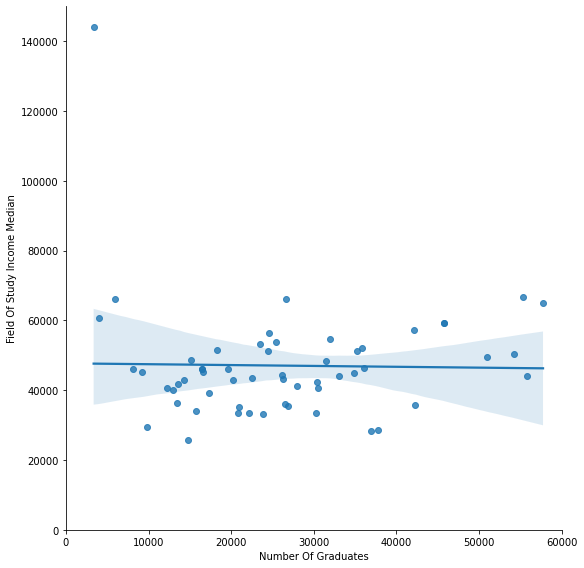

In [0]:
# Correlation showing in Plot
Rel_Plot = sns.lmplot(x = "Number Of Graduates", y = "Field Of Study Income Median",size=(8) , data = df_correlation)
Rel_Plot = (Rel_Plot.set(xlim=(0,60000), ylim=(0,150000)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e2af9f4a8>,
      dtype=object)

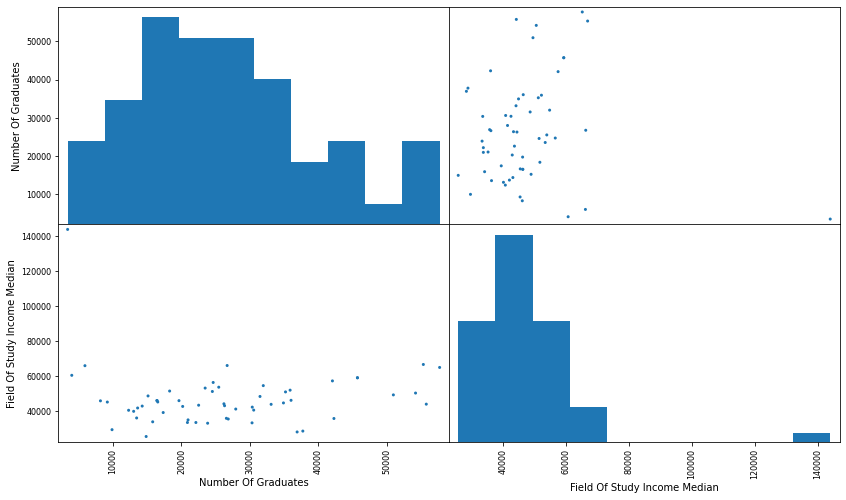

In [0]:
# Scatter Mmatrix Plot
from pandas.plotting import scatter_matrix
scatter_matrix(df_correlation, figsize=(14,8), alpha=1)

## Conclusion: 
There are no relationship between Number of Graduates and Income median of each field of study